Final Project Submission
Please fill out:
* Student name: Claudia Tsai
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# King County Market Report

## Business Overview

 - Does season affect house price ?
 - Which season has more choices of houses?
 - What features affect property value the most? 

## King County House Sales Dataset 
 - 21,597 house records.
 - 20 different features.
 - From May 2014 to May 2015

# Obtaining the Data

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
import folium

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter

## Obtain Data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

- Check the data types and non-null count in the dataset.
- Get to know what variables in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

A note after reviewing the data types in the dataset:<br>
 - The data type of "date"  and "sqft_basement" is object, which should be datetime and integer. Will take a closer look and see if both columns need to drop or to change.<br>
 - Variables waterfront, view, condition, and grade are in Object data type. Will also work on those variables.

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Get the description of columns in the dataset.

In [5]:
columns = open("data/column_names.md", "r")
test= pd.DataFrame(columns)
test
#print(columns.read())
#columns.close()

,0
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n
5,* `bathrooms` - Number of bathrooms\n
6,* `sqft_living` - Square footage of living spa...
7,* `sqft_lot` - Square footage of the lot\n
8,* `floors` - Number of floors (levels) in house\n
9,* `waterfront` - Whether the house is on a wat...


Change the float_format of pandas in pandas set_option

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
def millions(tick_val,pos):
    """adapted from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html"""
    val = round(tick_val/1000000, 1)
    new_tick_format = '${:.0f}M'.format(val)
    return new_tick_format
form = FuncFormatter(millions)

# Scrubbing and Cleaning Data

Display summary statistics for the dataset.

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


After viewing above data description, the maximum number of bedrooms is 33, which is not common. Need to see if any odd number in the data set.

In [9]:
df.loc[df['bedrooms']>10]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.000,11,3.000,3000,4960,2.000,NO,NONE,...,7 Average,2400,600.0,1918,1999.000,98106,47.556,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.000,33,1.750,1620,6000,1.000,NO,NONE,...,7 Average,1040,580.0,1947,0.000,98103,47.688,-122.331,1330,4700


- There are two houses with 11 bedrooms and 33 bedrooms.
- If look at the sqft_living and price of both houses, the bedroom numbers look like typo.
So both bedroom numbers were replaced to 3.

In [10]:
# If look at the bedrooms and sqft_living, the houses with bedroom 11 and 33 look like typo.
# The bedrooms number with be replaced to 3.
df['bedrooms']=df['bedrooms'].replace([11,33],3)

Check the column again and make sure the replace works.

In [11]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 10], dtype=int64)

## Detecting and Dealing with Null Values

Try to find if any null values in the dataset.

In [12]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill null value in "view" colum 

In [13]:
# Look at column "view"
df.view.value_counts(normalize= True)

NONE        0.902
AVERAGE     0.044
GOOD        0.024
FAIR        0.015
EXCELLENT   0.015
Name: view, dtype: float64

In [14]:
# fill the null value with 'NONE'
df.view = df.view.fillna('NONE')
df.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

### Fill null value in "waterfront" column 

In [15]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [16]:
# fill the null value with 'NO'
df.waterfront = df.waterfront.fillna('NO')

In [17]:
df.waterfront.unique()

array(['NO', 'YES'], dtype=object)

### Fill null value in "yr_renovated" column

In [18]:
# Look at column "yr_renovated"
print(sorted(df.yr_renovated.unique()))

[0.0, 1945.0, 1954.0, 1970.0, 1971.0, 1980.0, 1991.0, nan, 1934.0, 1940.0, 1944.0, 1946.0, 1948.0, 1950.0, 1951.0, 1953.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


In [19]:
# fill null values in yr_renovvated with 0
df.yr_renovated = df.yr_renovated.fillna(0)

In [20]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [21]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

### Dealing with Data Type

In [22]:
# Look into sqft_basement since the data type is object.
df.sqft_basement.value_counts(normalize = True)

0.0      0.594
?        0.021
600.0    0.010
500.0    0.010
700.0    0.010
          ... 
417.0    0.000
3260.0   0.000
1960.0   0.000
1990.0   0.000
248.0    0.000
Name: sqft_basement, Length: 304, dtype: float64

In [23]:
# From the above, 59% houses in this data set has 0 sqft_basement information.
# Since "?" count as 0.021 in this column, it'd better not to drop ? from the data set at this moment.
# Two thing I would do here.
# First is to calculate the sqft_basement by subtracting sqft_above from sqft_living.
df['cal_sqft_basement'] = df['sqft_living'] - df['sqft_above']    

# Second is to convert sqft_basement as "Yes" or "No", which is 1 or 0, which makes it like categorical.
df['cal_sqft_basement'] = df['cal_sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

# Test if the converting data to categorical data works.
df['cal_sqft_basement'].unique()

array([0, 1], dtype=int64)

In [24]:
df['cal_sqft_basement'].value_counts()

0    13110
1     8487
Name: cal_sqft_basement, dtype: int64

In [25]:
# Column "waterfront" data type is object.
# Convert it into data type integer.
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x =='YES' else 0)
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [26]:
# Convert column "view" data type from object to integer
df['view']= df['view'].apply(lambda x:0 if x=='NONE'
                                                  else (1 if x=='FAIR'
                                                  else (2 if x=='AVERAGE'
                                                  else (3 if x=='GOOD'
                                                  else (4)))))
df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [27]:
# Convert column "condition" data type from object to integer
df['condition'] = df['condition'].apply(lambda x:0 if x=='Poor'
                                                  else (1 if x=='Fair'
                                                  else (2 if x=='Average'
                                                  else (3 if x=='Good'
                                                  else (4)))))
df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [28]:
df['grade'] = df['grade'].astype(str).str[:2].astype(int)
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

## Add a few columns for EDA

In [29]:
# Convert the release_date columns type to datetime.
df['date'] = pd.to_datetime(df['date'])
df['date'].min()

Timestamp('2014-05-02 00:00:00')

In [30]:
# Created new columns of year and month in order to analyze the data by months or seasons.
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cal_sqft_basement,year_sold,month_sold
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,1955,0.000,98178,47.511,-122.257,1340,5650,0,2014,10
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,1951,1991.000,98125,47.721,-122.319,1690,7639,1,2014,12
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,1933,0.000,98028,47.738,-122.233,2720,8062,0,2015,2
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,1965,0.000,98136,47.521,-122.393,1360,5000,1,2014,12
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,1987,0.000,98074,47.617,-122.045,1800,7503,0,2015,2


In [31]:
# Creating a new column to sort the houses sold in seasons
df['seasons'] = df['month_sold'].apply(lambda x : 'Summer' if x > 5 and x < 9
                                                     else ('Spring' if x >= 3 and x < 6
                                                     else('Winter' if x >11 or x < 3
                                                     else('Fall'))))

In [32]:
# Double check if the function works
df.loc[0:5,['month_sold','seasons']]

,month_sold,seasons
0,10,Fall
1,12,Winter
2,2,Winter
3,12,Winter
4,2,Winter
5,5,Spring


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  float64       
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  float64       
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  float64       
 8   waterfront         21597 non-null  int64         
 9   view               21597 non-null  int64         
 10  condition          21597 non-null  int64         
 11  grade              21597 non-null  int32         
 12  sqft_above         21597 non-null  int64         
 13  sqft_basement      21597 non-null  object        
 14  yr_bui

## Checking for Multicollinearity

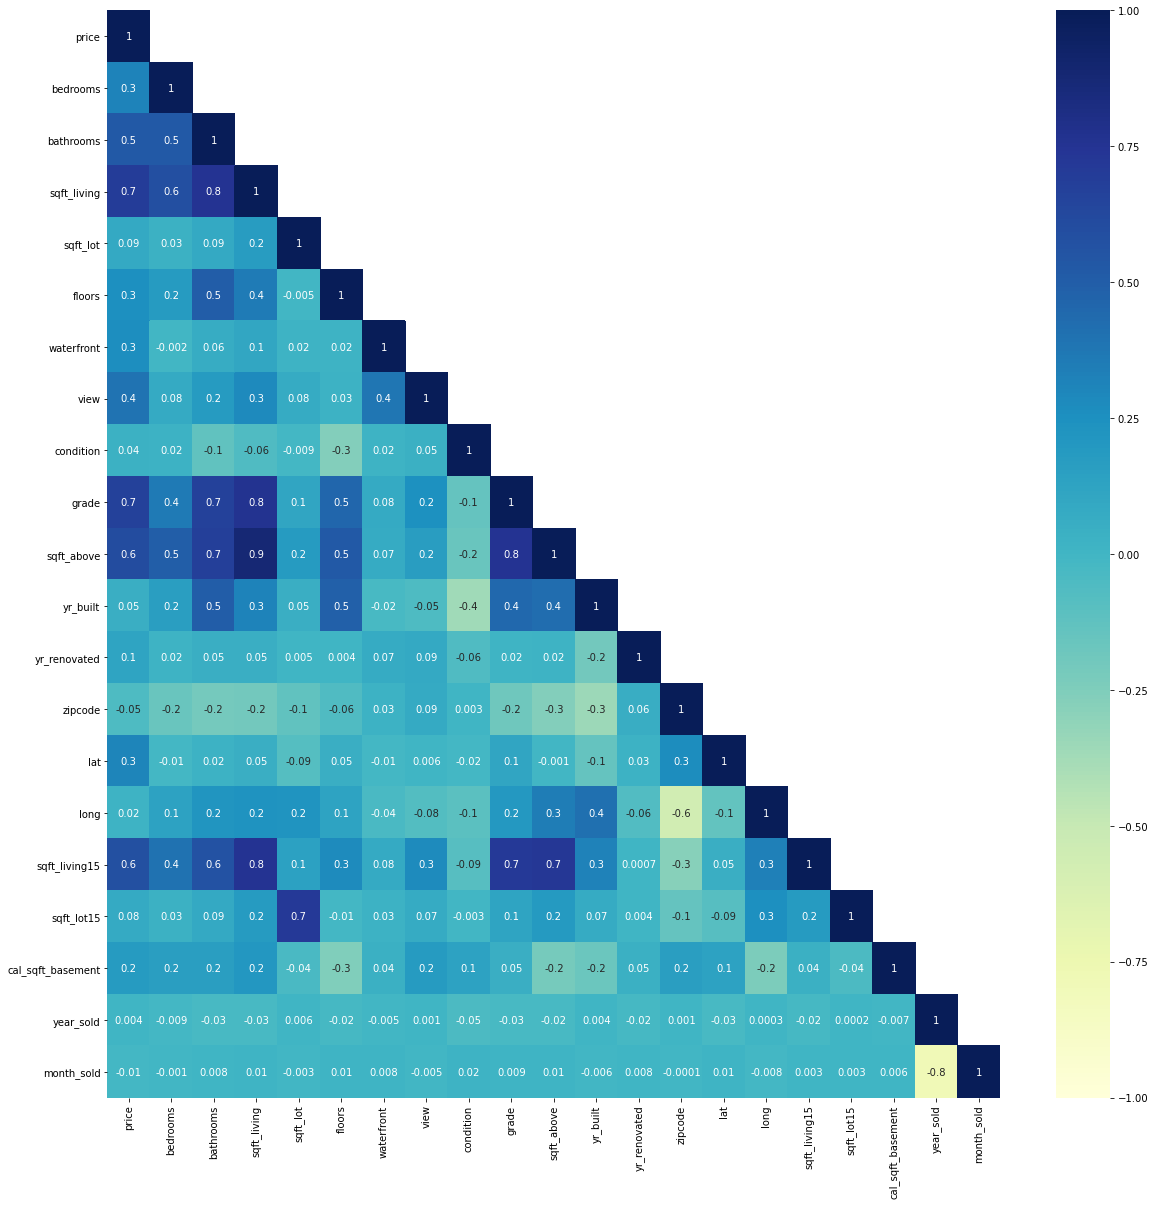

In [34]:
'''showed the lower triangular heatmap
https://datavizpyr.com/how-to-make-lower-triangular-heatmap-with-python/
'''
corr = df.drop(columns = "id").corr()
corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);

- As we can see from the above heatmap, the price has more than 0.5 correlation with sqft_above,sqft_living, sqft_living15, and grade.
- sqft_living includes basement sqft. In this case, I would keep sqft_living and drop sqft_above since they are highly correlating.
- A Realtor often replies with the phrase, "location, location, location."  Where a home is located is the most important factor in it's value. Since location is the only factor that couldn't be changed, we will look into zipcode in the dataset later.

## Select the variables to create a dataframe containing continuous data

In [35]:
cont= ['price','sqft_living','sqft_living15','grade']
df_cont = df.loc[:,cont]
df_cont.head()

,price,sqft_living,sqft_living15,grade
0,221900.000,1180,1340,7
1,538000.000,2570,1690,7
2,180000.000,770,2720,6
3,604000.000,1960,1360,7
4,510000.000,1680,1800,8


Check continuous data if follow a normal distribution.

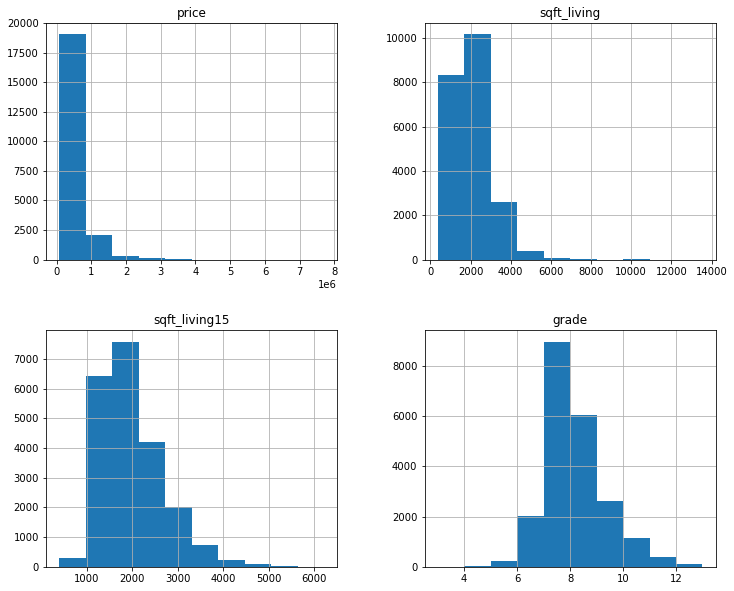

In [36]:
df_cont.hist(figsize=(12,10));

# Exploring the Data

## Find out the price distribution

Text(0.5, 1.0, 'Home Price Distribution in King County')

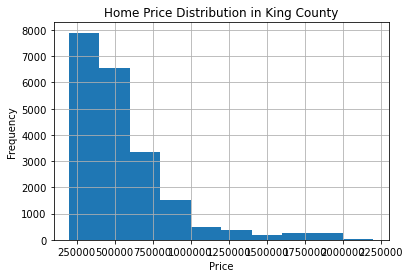

In [37]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
bins_list = [200000,400000,600000,800000,1000000,1200000,1400000,1600000,2000000,2200000]
ax=df.price.hist(bins=bins_list)
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
#ax.xaxis.set_major_formatter(form)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_title("Home Price Distribution in King County")


## Find out the average price by zipcode

In [38]:
df_price=df.groupby('zipcode')['price'].mean()

In [39]:
df_price.head()

zipcode
98001    281194.870
98002    234284.035
98003    294111.279
98004   1356523.991
98005    810289.696
Name: price, dtype: float64

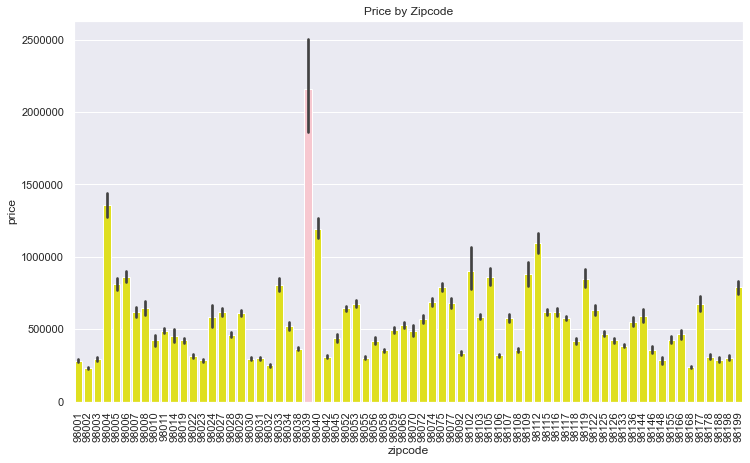

In [40]:
sns.set(rc={'figure.figsize':(12,7)})
clrs=['yellow' if (value < max(df_price.values)) else 'pink' for value in df_price.values]
ax=sns.barplot(data=df,x='zipcode',y='price',palette=clrs)
ax.set_xlabel('zipcode')
ax.set_ylabel('price')
ax.set_title('Price by Zipcode')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Zip 98039 (Madina, WA) has the highest average sold price in King County.

### Find out top 10 average price by zipcode

In [41]:
df_price_sort=df.groupby('zipcode')['price'].mean().sort_values(ascending= False)

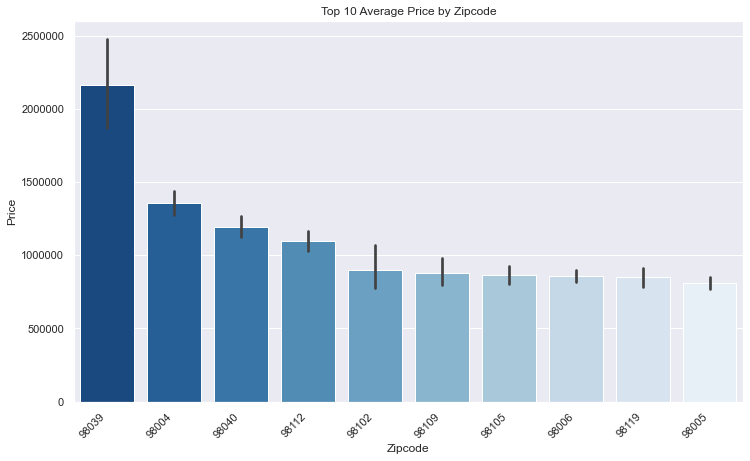

In [42]:
ax=sns.barplot(data=df,order= df_price_sort.index[:10],x='zipcode',y='price',palette='Blues_r')
ax.set_ylabel('Price')
ax.set_xlabel('Zipcode')
ax.set_title('Top 10 Average Price by Zipcode')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right");

## Find out the average price by season

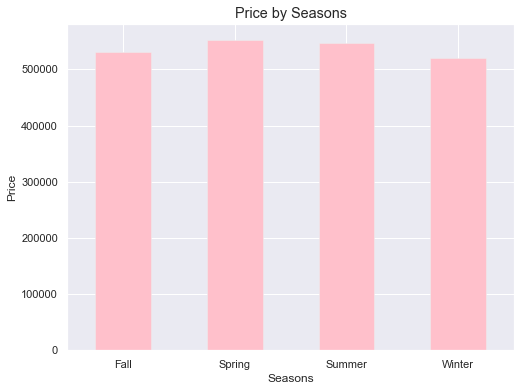

In [43]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
df.groupby('seasons')['price'].mean().plot(kind='bar',color='pink')
ax.set_ylabel('Price')
ax.set_xlabel('Seasons')
ax.set_title('Price by Seasons')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Spring and Summer has higher average sold price than Fall and Winter.

## Find out the number of houses sold by seasons

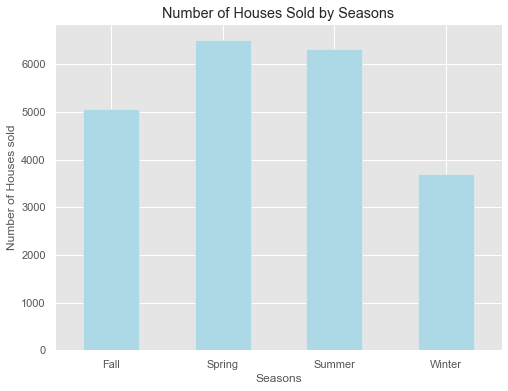

In [44]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
df.groupby('seasons')['id'].count().plot(kind='bar',color='lightblue')
ax.set_ylabel('Number of Houses sold')
ax.set_xlabel('Seasons')
ax.set_title('Number of Houses Sold by Seasons')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

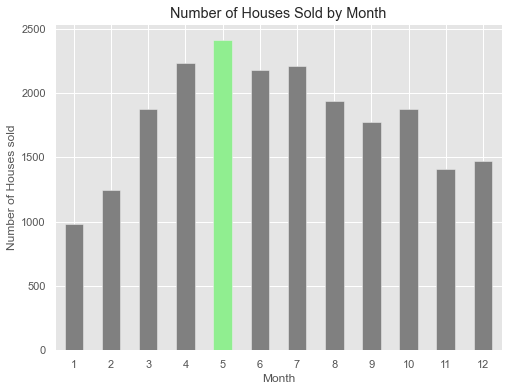

In [45]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
house_count= df.groupby('month_sold')['id'].count()
clrs=['grey' if (value < max(house_count.values)) else 'lightgreen' for value in house_count.values]
house_count.plot(kind='bar',color=clrs)

ax.set_ylabel('Number of Houses sold')
ax.set_xlabel('Month')
ax.set_title('Number of Houses Sold by Month')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

 - Spring is the season with most houses sold and then Summer.
 - Winter is the season with least houses sold.

## Find out the average price by grade

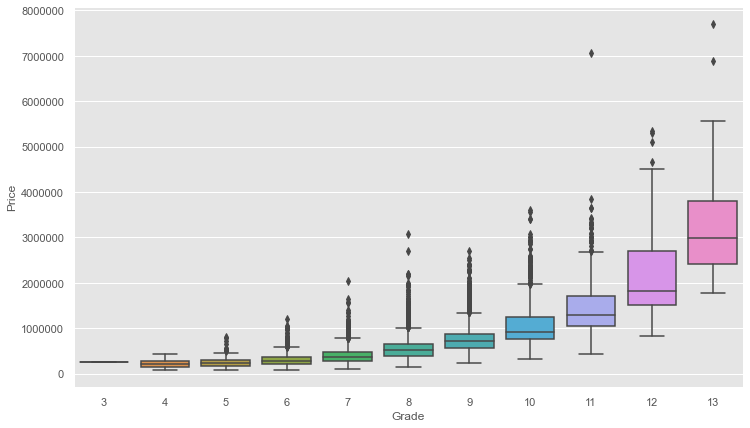

In [46]:
ax=sns.boxplot(x="grade",y='price',data=df)
#sns.despine(offset =10,trim= True)
ax.set_xlabel("Grade")
ax.set_ylabel("Price")
#ax.yaxis.set_major_formatter(form)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

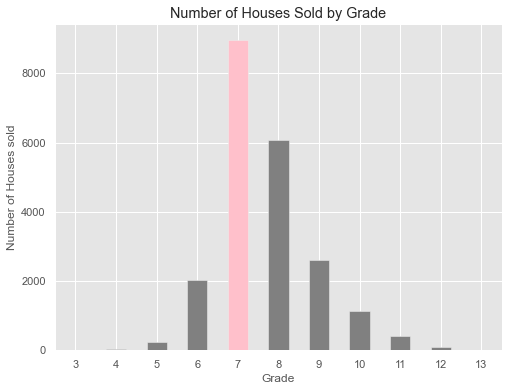

In [47]:
fig,ax=plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
grade_count= df.groupby('grade')['id'].count()
clrs=['grey' if (value < max(grade_count.values)) else 'pink' for value in grade_count.values]
grade_count.plot(kind='bar',color=clrs)

ax.set_ylabel('Number of Houses sold')
ax.set_xlabel('Grade')
ax.set_title('Number of Houses Sold by Grade')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

## Find out the average price by waterfront

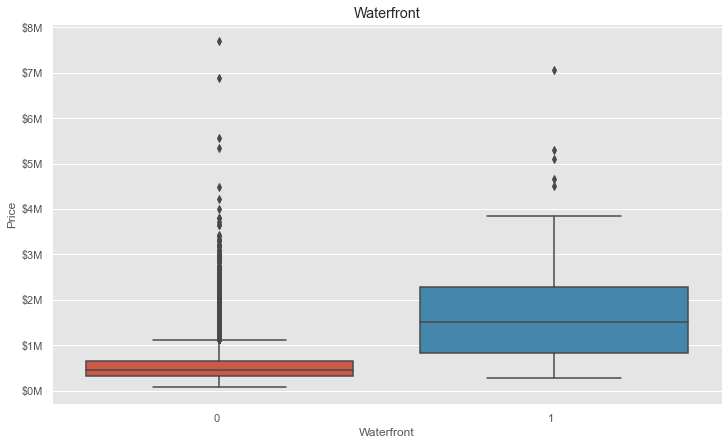

In [48]:
ax=sns.boxplot(x="waterfront",y='price',data=df)

ax.set_ylabel('Price')
ax.set_xlabel('Waterfront')
ax.set_title('Waterfront')
ax.yaxis.set_major_formatter(form)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,ha="right");

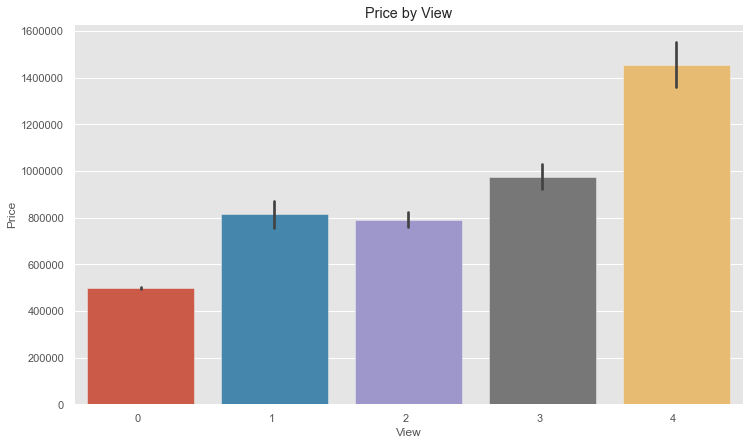

In [49]:
ax=sns.barplot(x="view",y='price',data=df)

ax.set_ylabel('Price')
ax.set_xlabel('View')
ax.set_title('Price by View')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax.yaxis.set_major_formatter(form)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,ha="right");

## Show the price distribution by location

Show the location of sold houses in grades.

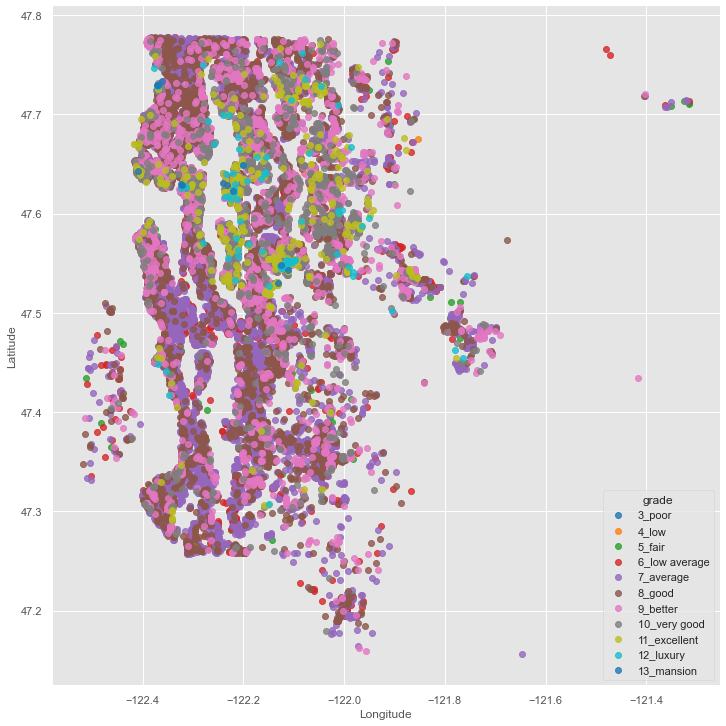

In [50]:
sns.lmplot(y = "lat", x = "long", hue = "grade", data = df, fit_reg = False, height = 10, legend = False, palette = "tab10")
plt.legend(title='grade', loc='lower right', labels=['3_poor', '4_low','5_fair','6_low average','7_average','8_good','9_better','10_very good','11_excellent','12_luxury','13_mansion'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Show the location of sold houses and price by utilizing latitude and longitude provided in the dataset.

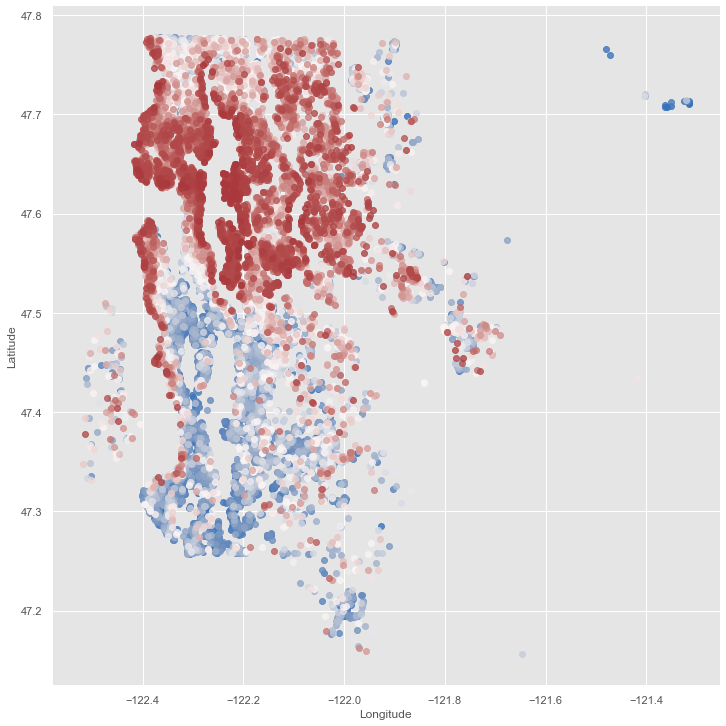

In [51]:
# Color description : light blue - lowest price to dark red -highest price
sns.lmplot(y = "lat", x = "long", hue = "price", data = df, fit_reg = False, height = 10, legend = False, palette = "vlag")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Check for Linearity

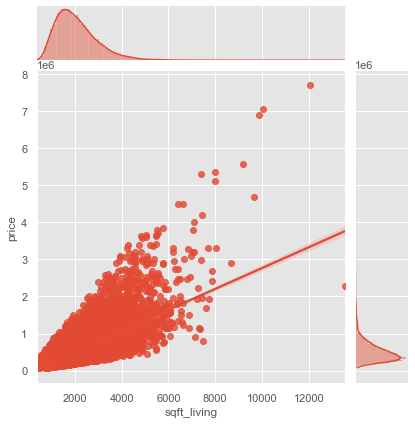

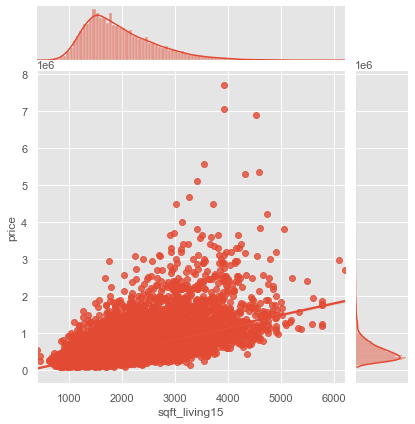

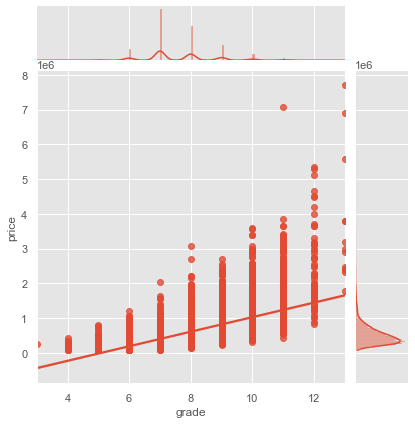

In [52]:
for col in df_cont.columns[1:]:
    sns.jointplot(col,'price',data=df_cont,kind='reg');

From above visualizations, the columns 'sqft_living', 'bathrooms' and 'sqft_living15' has linear relationship with 'price'. Grades are more like categorical variables but also show linear relationship with price.

# Modeling the Data

## Baseline Model

Use variables sqft_living, sqft_living15 and grade to create baseline model

In [53]:
outcome = 'price'
predictors = df_cont.drop('price',axis = 1)
pred_sum='+'.join(predictors.columns)

formula = outcome + '~' + pred_sum
model_a = smf.ols(data = df_cont, formula = formula).fit()

model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8282.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:07   Log-Likelihood:            -2.9912e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.988e+05   1.34e+04    -44.751      0.000   -6.25e+05   -5.73e+05
sqft_living     178.3426      3.249     54.892      0.000     171.974     184.711
sqft_living15    15.2814      4.020      3.802      0.000       7.402      23.161
grade          9.633e+04   2374.911     40.561      0.000    9.17e+04    1.01e+05
==============================================================================
Omnibus:                    17073.030   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043757.328
Skew:                           3.328   Prob(JB):                         0.00
Kurtosis:                      36.400   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A note for above table:
- Sqft-living has the highes coefficient. There is no variables with p-value higher than 0.05.
- R-Squared value is 0.535. 
- Continue to check the Normality and Homoscedasticity Assumptions.


### Check the Normality Assumption

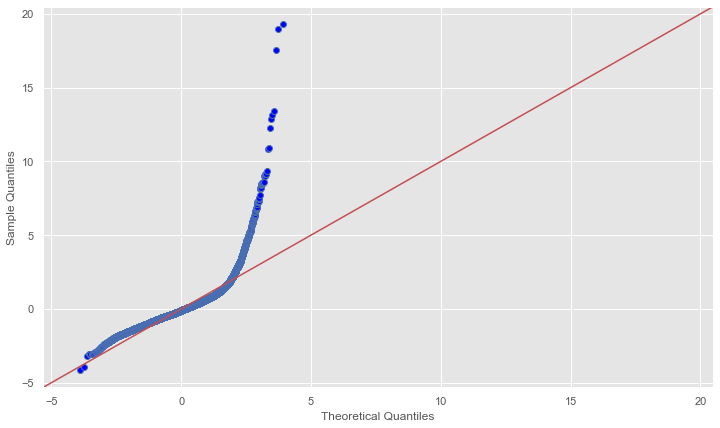

In [54]:
fig = sm.graphics.qqplot(model_a.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

In [55]:
col_a = list(predictors.columns)
col_a

['sqft_living', 'sqft_living15', 'grade']

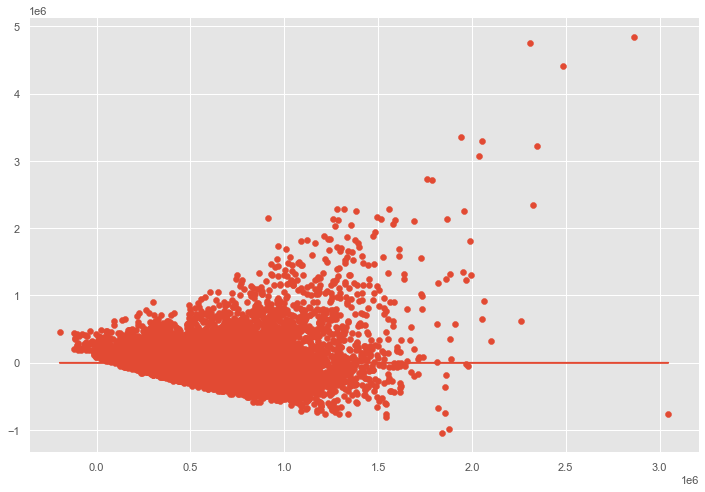

In [56]:
#Visualizing the errors
plt.figure(figsize=(12,8))
plt.scatter(model_a.predict(df_cont[col_a]), model_a.resid)
plt.plot(model_a.predict(df_cont[col_a]), [0 for i in range(len(df_cont))])

## Adding categorical variables for modeling

In [57]:
#Convert categorial variables,'seasons' and 'waterfront' to utilize them as predictors of price.
season_dummies = pd.get_dummies(df['seasons'],prefix='season')
waterfront_dummies = pd.get_dummies(df['waterfront'],prefix='waterfront')
condition_dummies = pd.get_dummies(df['condition'],prefix='condition')
view_dummies = pd.get_dummies(df['view'],prefix='view')
bdr_dummies = pd.get_dummies(df['bedrooms'],prefix='bedroom')
bath_dummies = pd.get_dummies(df['bathrooms'],prefix='bathroom')
bath_dummies.columns = bath_dummies.columns.str.replace('.','_')

Check the dataframe to see what it looks like.

In [58]:
df_b= pd.concat([df_cont,season_dummies,waterfront_dummies,condition_dummies,view_dummies,bdr_dummies,bath_dummies],axis =1)
df_b.tail()

,price,sqft_living,sqft_living15,grade,season_Fall,season_Spring,season_Summer,season_Winter,waterfront_0,waterfront_1,...,bathroom_5_25,bathroom_5_5,bathroom_5_75,bathroom_6_0,bathroom_6_25,bathroom_6_5,bathroom_6_75,bathroom_7_5,bathroom_7_75,bathroom_8_0
21592,360000.000,1530,1530,8,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.000,2310,1830,8,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
21594,402101.000,1020,1020,7,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21595,400000.000,1600,1410,8,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
21596,325000.000,1020,1020,7,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
outcome = 'price'
predictors = df_b.drop('price',axis = 1)
pred_sum='+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_b = smf.ols(data = df_b, formula = formula).fit()

model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     775.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:08   Log-Likelihood:            -2.9600e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21544   BIC:                         5.925e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.566e+04   1.37e+04      5.538      0.000    4.89e+04    1.02e+05
sqft_living     146.0457      3.690     39.577      0.000     138.813     153.279
sqft_living15    29.4408      3.599      8.180      0.000      22.387      36.495
grade          1.109e+05   2214.106     50.096      0.000    1.07e+05    1.15e+05
season_Fall    1.195e+04   4299.799      2.779      0.005    3522.407    2.04e+04
season_Spring  4.029e+04   4189.816      9.617      0.000    3.21e+04    4.85e+04
season_Summer  1.608e+04   4226.049      3.805      0.000    7797.622    2.44e+04
season_Winter  7338.7084   4519.587      1.624      0.104   -1520.018    1.62e+04
waterfront_0  -2.348e+05   1.11e+04    -21.148      0.000   -2.57e+05   -2.13e+05
waterfront_1   3.104e+05   1.46e+04     21.195      0.000    2.82e+05    3.39e+05
condition_0    8739.5469   3.33e+04      0.263      0.793   -5.65e+04     7.4e+04
condition_1   -2.132e+04   1.58e+04     -1.354      0.176   -5.22e+04    9552.528
condition_2   -3.111e+04   8779.804     -3.544      0.000   -4.83e+04   -1.39e+04
condition_3    1.604e+04   8881.246      1.806      0.071   -1369.255    3.34e+04
condition_4    1.033e+05   9546.914     10.823      0.000    8.46e+04    1.22e+05
view_0         -1.15e+05   5541.916    -20.754      0.000   -1.26e+05   -1.04e+05
view_1         2.532e+04   1.09e+04      2.320      0.020    3923.811    4.67e+04
view_2        -3.304e+04   7718.387     -4.281      0.000   -4.82e+04   -1.79e+04
view_3         2.362e+04   9292.148      2.542      0.011    5409.174    4.18e+04
view_4         1.748e+05   1.24e+04     14.139      0.000    1.51e+05    1.99e+05
bedroom_1      9.855e+04   2.27e+04      4.344      0.000    5.41e+04    1.43e+05
bedroom_2      7.318e+04   1.79e+04      4.099      0.000    3.82e+04    1.08e+05
bedroom_3      1.566e+04   1.74e+04      0.900      0.368   -1.85e+04    4.98e+04
bedroom_4     -3116.6547   1.74e+04     -0.179      0.858   -3.72e+04    3.09e+04
bedroom_5       617.6491   1.78e+04      0.035      0.972   -3.42e+04    3.55e+04
bedroom_6     -3.474e+04   2.07e+04     -1.678      0.093   -7.53e+04    5849.620
bedroom_7     -1.699e+05   3.66e+04     -4.647      0.000   -2.42e+05   -9.82e+04
bedroom_8      1.253e+05   5.73e+04      2.187      0.029     1.3e+04    2.38e+05
bedroom_9      1.023e+05   8.92e+04      1.147      0.252   -7.26e+04    2.77e+05
bedroom_10    -1.322e+05   1.16e+05     -1.144      0.253   -3.59e+05    9.42e+04
bathroom_0_5  -4.594e+05   1.07e+05     -4.309      0.000   -6.68e+05    -2.5e+05
bathroom_0_75 -3.848e+05   3.22e+04    -11.949      0.000   -4.48e+05   -3.22e+05
bathroom_1_0  -3.857e+05   1.95e+04    -19.752      0.000   -4.24e+05   -3.47e+05
bathroom_1_25  -4.42e+05   7.24e+04     -6.101      0.000   -5.84e+05      -3e+05
bathroom_1_5  -4.288e+05   1.96e+04    -21.830   

### Remove the uninfluential features 

In [60]:
# Extract the p-value from the summary and use it to subset our features
summary_b= model_b.summary()
p_table = summary_b.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

59 45
['sqft_living', 'sqft_living15', 'grade', 'season_Fall', 'season_Spring', 'season_Summer', 'waterfront_0', 'waterfront_1', 'condition_2', 'condition_4', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_1', 'bedroom_2', 'bedroom_7', 'bedroom_8', 'bathroom_0_5', 'bathroom_0_75', 'bathroom_1_0', 'bathroom_1_25', 'bathroom_1_5', 'bathroom_1_75', 'bathroom_2_0', 'bathroom_2_25', 'bathroom_2_5', 'bathroom_2_75', 'bathroom_3_0', 'bathroom_3_25', 'bathroom_3_5', 'bathroom_3_75', 'bathroom_4_0', 'bathroom_4_25', 'bathroom_4_5', 'bathroom_4_75', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_6_5', 'bathroom_7_5', 'bathroom_7_75', 'bathroom_8_0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.566e+04,1.37e+04,5.538,0.000,4.89e+04,1.02e+05
sqft_living,146.0457,3.690,39.577,0.000,138.813,153.279
sqft_living15,29.4408,3.599,8.180,0.000,22.387,36.495
grade,1.109e+05,2214.106,50.096,0.000,1.07e+05,1.15e+05
season_Fall,1.195e+04,4299.799,2.779,0.005,3522.407,2.04e+04


Refit the model with subset features

In [61]:
outcome = 'price'
predictors='+'.join(x_cols)
#predictors = df_b.drop('price',axis = 1)
#pred_sum='+'.join(predictors.columns)
formula = outcome + '~' + predictors
model_b = smf.ols(data = df_b, formula = formula).fit()

model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     934.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:08   Log-Likelihood:            -2.9602e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21553   BIC:                         5.925e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.977e+04   2.48e+04      3.213      0.001    3.11e+04    1.28e+05
sqft_living     139.9365      3.450     40.559      0.000     133.174     146.699
sqft_living15    29.1707      3.589      8.128      0.000      22.136      36.205
grade          1.128e+05   2174.891     51.858      0.000    1.09e+05    1.17e+05
season_Fall    4988.9586   4707.430      1.060      0.289   -4237.952    1.42e+04
season_Spring  3.319e+04   4478.424      7.410      0.000    2.44e+04     4.2e+04
season_Summer  9317.5546   4507.820      2.067      0.039     481.894    1.82e+04
waterfront_0  -2.348e+05   1.48e+04    -15.820      0.000   -2.64e+05   -2.06e+05
waterfront_1   3.146e+05   1.82e+04     17.268      0.000    2.79e+05     3.5e+05
condition_2   -4.526e+04   3531.870    -12.814      0.000   -5.22e+04   -3.83e+04
condition_4    8.831e+04   6023.397     14.662      0.000    7.65e+04       1e+05
view_0        -1.155e+05   6875.535    -16.795      0.000   -1.29e+05   -1.02e+05
view_1         2.645e+04   1.17e+04      2.252      0.024    3425.489    4.95e+04
view_2        -3.197e+04   8772.137     -3.645      0.000   -4.92e+04   -1.48e+04
view_3         2.454e+04   1.02e+04      2.410      0.016    4581.201    4.45e+04
view_4         1.762e+05    1.3e+04     13.565      0.000    1.51e+05    2.02e+05
bedroom_1      8.373e+04   1.64e+04      5.107      0.000    5.16e+04    1.16e+05
bedroom_2      6.057e+04   5019.621     12.067      0.000    5.07e+04    7.04e+04
bedroom_7     -1.657e+05    3.6e+04     -4.599      0.000   -2.36e+05   -9.51e+04
bedroom_8       1.26e+05   6.09e+04      2.068      0.039    6604.229    2.45e+05
bathroom_0_5  -4.357e+05   1.15e+05     -3.787      0.000   -6.61e+05    -2.1e+05
bathroom_0_75 -3.606e+05   4.63e+04     -7.786      0.000   -4.51e+05    -2.7e+05
bathroom_1_0  -3.604e+05   3.79e+04     -9.513      0.000   -4.35e+05   -2.86e+05
bathroom_1_25 -4.152e+05   8.16e+04     -5.088      0.000   -5.75e+05   -2.55e+05
bathroom_1_5  -4.033e+05   3.79e+04    -10.642      0.000   -4.78e+05   -3.29e+05
bathroom_1_75 -4.191e+05   3.76e+04    -11.157      0.000   -4.93e+05   -3.45e+05
bathroom_2_0  -4.102e+05   3.77e+04    -10.893      0.000   -4.84e+05   -3.36e+05
bathroom_2_25 -4.366e+05   3.75e+04    -11.651      0.000    -5.1e+05   -3.63e+05
bathroom_2_5  -4.901e+05   3.71e+04    -13.198      0.000   -5.63e+05   -4.17e+05
bathroom_2_75 -4.599e+05   3.74e+04    -12.288      0.000   -5.33e+05   -3.87e+05
bathroom_3_0  -4.126e+05   3.77e+04    -10.956      0.000   -4.86e+05   -3.39e+05
bathroom_3_25  -3.48e+05   3.77e+04     -9.226      0.000   -4.22e+05   -2.74e+05
bathroom_3_5   -4.05e+05   3.74e+04    -10.818      0.000   -4.78e+05   -3.32e+05
bathroom_3_75 -2.485e+05   4.04e+04     -6.151      0.000   -3.28e+05   -1.69e+05
bathroom_4_0   -2.56e+05   4.09e+04     -6.262   

Remove the uninfluential features again.

In [62]:
# Extract the p-value from the summary and use it to subset our features
summary_b= model_b.summary()
p_table = summary_b.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

46 44
['sqft_living', 'sqft_living15', 'grade', 'season_Spring', 'season_Summer', 'waterfront_0', 'waterfront_1', 'condition_2', 'condition_4', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4', 'bedroom_1', 'bedroom_2', 'bedroom_7', 'bedroom_8', 'bathroom_0_5', 'bathroom_0_75', 'bathroom_1_0', 'bathroom_1_25', 'bathroom_1_5', 'bathroom_1_75', 'bathroom_2_0', 'bathroom_2_25', 'bathroom_2_5', 'bathroom_2_75', 'bathroom_3_0', 'bathroom_3_25', 'bathroom_3_5', 'bathroom_3_75', 'bathroom_4_0', 'bathroom_4_25', 'bathroom_4_5', 'bathroom_4_75', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_6_5', 'bathroom_7_5', 'bathroom_7_75', 'bathroom_8_0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,7.977e+04,2.48e+04,3.213,0.001,3.11e+04,1.28e+05
sqft_living,139.9365,3.450,40.559,0.000,133.174,146.699
sqft_living15,29.1707,3.589,8.128,0.000,22.136,36.205
grade,1.128e+05,2174.891,51.858,0.000,1.09e+05,1.17e+05
season_Fall,4988.9586,4707.430,1.060,0.289,-4237.952,1.42e+04


Refit the model with subset features once again.

In [63]:
outcome = 'price'
predictors='+'.join(x_cols)
#predictors = df_b.drop('price',axis = 1)
#pred_sum='+'.join(predictors.columns)
formula = outcome + '~' + predictors
model_b = smf.ols(data = df_b, formula = formula).fit()

model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     957.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:08   Log-Likelihood:            -2.9602e+05
No. Observations:               21597   AIC:                         5.921e+05
Df Residuals:                   21554   BIC:                         5.925e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.162e+04   2.48e+04      3.296      0.001    3.31e+04     1.3e+05
sqft_living     139.9283      3.450     40.556      0.000     133.166     146.691
sqft_living15    29.1697      3.589      8.128      0.000      22.136      36.204
grade          1.128e+05   2174.893     51.860      0.000    1.09e+05    1.17e+05
season_Spring   3.03e+04   3558.047      8.517      0.000    2.33e+04    3.73e+04
season_Summer  6431.9308   3592.624      1.790      0.073    -609.878    1.35e+04
waterfront_0   -2.34e+05   1.48e+04    -15.786      0.000   -2.63e+05   -2.05e+05
waterfront_1   3.156e+05   1.82e+04     17.349      0.000     2.8e+05    3.51e+05
condition_2   -4.525e+04   3531.866    -12.811      0.000   -5.22e+04   -3.83e+04
condition_4    8.844e+04   6022.146     14.687      0.000    7.66e+04       1e+05
view_0        -1.151e+05   6865.670    -16.762      0.000   -1.29e+05   -1.02e+05
view_1         2.683e+04   1.17e+04      2.285      0.022    3817.593    4.98e+04
view_2        -3.157e+04   8763.827     -3.602      0.000   -4.87e+04   -1.44e+04
view_3         2.492e+04   1.02e+04      2.449      0.014    4976.476    4.49e+04
view_4         1.765e+05    1.3e+04     13.590      0.000    1.51e+05    2.02e+05
bedroom_1      8.397e+04   1.64e+04      5.122      0.000    5.18e+04    1.16e+05
bedroom_2      6.061e+04   5019.514     12.074      0.000    5.08e+04    7.04e+04
bedroom_7     -1.651e+05    3.6e+04     -4.581      0.000   -2.36e+05   -9.44e+04
bedroom_8      1.258e+05   6.09e+04      2.065      0.039    6373.925    2.45e+05
bathroom_0_5  -4.369e+05   1.15e+05     -3.798      0.000   -6.62e+05   -2.11e+05
bathroom_0_75  -3.61e+05   4.63e+04     -7.796      0.000   -4.52e+05    -2.7e+05
bathroom_1_0  -3.606e+05   3.79e+04     -9.520      0.000   -4.35e+05   -2.86e+05
bathroom_1_25 -4.154e+05   8.16e+04     -5.091      0.000   -5.75e+05   -2.55e+05
bathroom_1_5  -4.036e+05   3.79e+04    -10.650      0.000   -4.78e+05   -3.29e+05
bathroom_1_75 -4.193e+05   3.76e+04    -11.163      0.000   -4.93e+05   -3.46e+05
bathroom_2_0  -4.104e+05   3.77e+04    -10.900      0.000   -4.84e+05   -3.37e+05
bathroom_2_25 -4.369e+05   3.75e+04    -11.658      0.000    -5.1e+05   -3.63e+05
bathroom_2_5  -4.903e+05   3.71e+04    -13.203      0.000   -5.63e+05   -4.18e+05
bathroom_2_75 -4.601e+05   3.74e+04    -12.295      0.000   -5.33e+05   -3.87e+05
bathroom_3_0  -4.128e+05   3.77e+04    -10.962      0.000   -4.87e+05   -3.39e+05
bathroom_3_25 -3.481e+05   3.77e+04     -9.228      0.000   -4.22e+05   -2.74e+05
bathroom_3_5  -4.052e+05   3.74e+04    -10.821      0.000   -4.79e+05   -3.32e+05
bathroom_3_75 -2.487e+05   4.04e+04     -6.154      0.000   -3.28e+05   -1.69e+05
bathroom_4_0  -2.566e+05   4.09e+04     -6.277      0.000   -3.37e+05   -1.76e+05
bathroom_4_25 -1.553e+05   4.38e+04     -3.548   

### Investigate Multicollinearity

In [64]:
X = df_b[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 4.591483558646912),
 ('sqft_living15', 2.7671584200770702),
 ('grade', 2.979138728003635),
 ('season_Spring', 1.2207159938678975),
 ('season_Summer', 1.2235023417286592),
 ('waterfront_0', inf),
 ('waterfront_1', inf),
 ('condition_2', 1.3000441851900004),
 ('condition_4', 1.2041398943898174),
 ('view_0', inf),
 ('view_1', inf),
 ('view_2', inf),
 ('view_3', inf),
 ('view_4', inf),
 ('bedroom_1', 1.105813953419913),
 ('bedroom_2', 1.2851341941151084),
 ('bedroom_7', 1.0432780682522926),
 ('bedroom_8', 1.0214688332248179),
 ('bathroom_0_5', 1.121662985282992),
 ('bathroom_0_75', 3.215426473308594),
 ('bathroom_1_0', 96.22835912901982),
 ('bathroom_1_25', 1.269444678817059),
 ('bathroom_1_5', 41.02953994518569),
 ('bathroom_1_75', 78.24449292014603),
 ('bathroom_2_0', 52.798452214630956),
 ('bathroom_2_25', 55.128349524025005),
 ('bathroom_2_5', 117.98967301323535),
 ('bathroom_2_75', 33.235504894598556),
 ('bathroom_3_0', 21.83993707053629),
 ('bathroom_3_25', 17.269313

Subset the features based on above findings.

In [65]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

44 26


Refit model with subset features.

In [66]:
# Refit model with subset features
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_b = smf.ols(formula=formula, data=df_b).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1190.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:12   Log-Likelihood:            -2.9779e+05
No. Observations:               21597   AIC:                         5.956e+05
Df Residuals:                   21570   BIC:                         5.958e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.792e+05   1.31e+04    -51.689      0.000   -7.05e+05   -6.53e+05
sqft_living     157.0609      3.355     46.810      0.000     150.484     163.638
sqft_living15    29.3792      3.830      7.671      0.000      21.872      36.886
grade          1.095e+05   2286.179     47.893      0.000    1.05e+05    1.14e+05
season_Spring  2.968e+04   3858.017      7.694      0.000    2.21e+04    3.72e+04
season_Summer  2170.4904   3893.872      0.557      0.577   -5461.786    9802.767
condition_2    -6.55e+04   3731.552    -17.553      0.000   -7.28e+04   -5.82e+04
condition_4    9.165e+04   6505.490     14.089      0.000    7.89e+04    1.04e+05
bedroom_1      1.595e+05   1.76e+04      9.055      0.000    1.25e+05    1.94e+05
bedroom_2      1.142e+05   5184.887     22.016      0.000    1.04e+05    1.24e+05
bedroom_7     -1.651e+05    3.9e+04     -4.229      0.000   -2.42e+05   -8.86e+04
bedroom_8      1.289e+05    6.6e+04      1.953      0.051    -465.608    2.58e+05
bathroom_0_5  -5.544e+04   1.18e+05     -0.470      0.638   -2.87e+05    1.76e+05
bathroom_0_75  7.971e+04   2.89e+04      2.761      0.006    2.31e+04    1.36e+05
bathroom_1_25  9.222e+04   7.87e+04      1.172      0.241    -6.2e+04    2.46e+05
bathroom_4_0    1.93e+05   2.07e+04      9.316      0.000    1.52e+05    2.34e+05
bathroom_4_25   3.19e+05   2.71e+04     11.787      0.000    2.66e+05    3.72e+05
bathroom_4_5   2.164e+05   2.41e+04      8.970      0.000    1.69e+05    2.64e+05
bathroom_4_75  6.747e+05   4.97e+04     13.574      0.000    5.77e+05    7.72e+05
bathroom_5_5    8.75e+05   7.52e+04     11.632      0.000    7.28e+05    1.02e+06
bathroom_5_75  8.614e+05   1.19e+05      7.250      0.000    6.29e+05    1.09e+06
bathroom_6_0   1.289e+06   9.72e+04     13.256      0.000     1.1e+06    1.48e+06
bathroom_6_25  1.091e+06   1.67e+05      6.524      0.000    7.63e+05    1.42e+06
bathroom_6_5   3.713e+04   1.67e+05      0.222      0.824   -2.91e+05    3.65e+05
bathroom_7_5  -2.525e+05   2.36e+05     -1.071      0.284   -7.15e+05     2.1e+05
bathroom_7_75  4.525e+06   2.36e+05     19.147      0.000    4.06e+06    4.99e+06
bathroom_8_0   2.262e+06    1.7e+05     13.323      0.000    1.93e+06     2.6e+06
==============================================================================
Omnibus:                    14308.632   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           608212.335
Skew:                           2.626   Prob(JB):                         0.00
Kurtosis:                      28.462   Cond. No.                     4.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+05. This

### Check the Normality Assumption

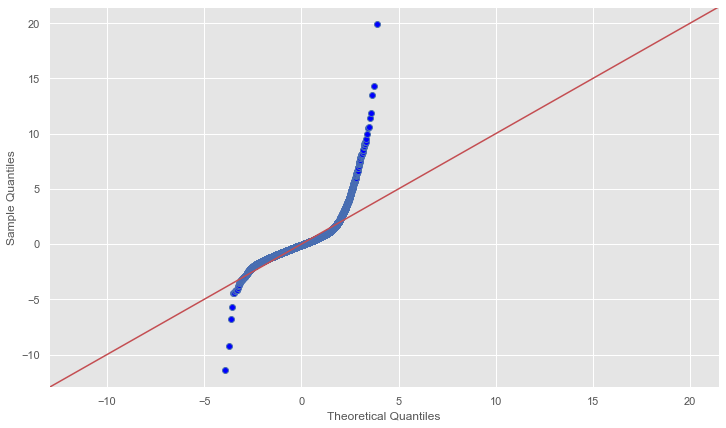

In [67]:
fig = sm.graphics.qqplot(model_b.resid, dist=stats.norm, line='45', fit=True)

### Check the Homoscedasticity Assumption

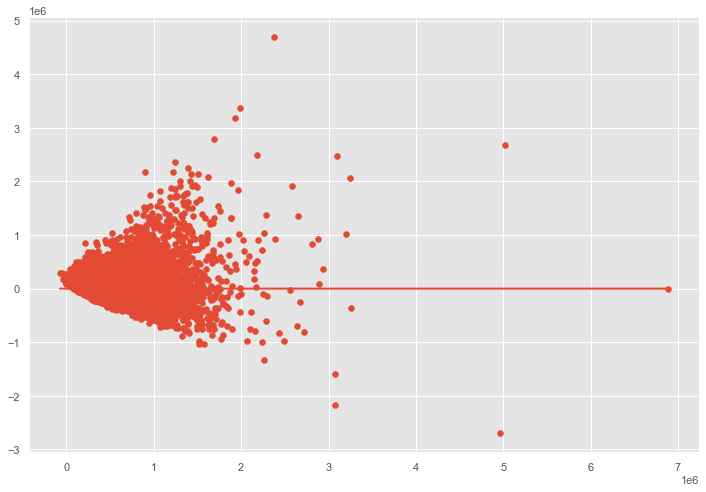

In [68]:
#Visualizing the errors
plt.figure(figsize=(12,8))
plt.scatter(model_b.predict(df_b[x_cols]), model_b.resid)
plt.plot(model_b.predict(df_b[x_cols]), [0 for i in range(len(df_b))])

## Add zip codes as variables to make a model

Add zipcodes to the dataframe with filtered p-value<0.05 columns

In [69]:
#One hot encode categoricals
zipcode_dummies = pd.get_dummies(df['zipcode'],prefix='zip')

#columns with p-value smaller than 0.05 from model_b 
df_b= df_b[x_cols]

#add variable "price in df_c"
df_price=df.loc[:,['price']]

#concatenate above 3 features as df_c
df_c= pd.concat([df_price,df_b,zipcode_dummies],axis =1)
df_c.head()

,price,sqft_living,sqft_living15,grade,season_Spring,season_Summer,condition_2,condition_4,bedroom_1,bedroom_2,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.000,1180,1340,7,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.000,2570,1690,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.000,770,2720,6,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.000,1960,1360,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.000,1680,1800,8,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fit the model with adding zip code.

In [70]:
outcome = 'price'
predictors_c = df_c.drop('price',axis = 1)
pred_sum_c='+'.join(predictors_c.columns)
formula = outcome + '~' + pred_sum_c
model_c= smf.ols(data = df_c, formula = formula).fit()

model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     767.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:13   Log-Likelihood:            -2.9142e+05
No. Observations:               21597   AIC:                         5.830e+05
Df Residuals:                   21501   BIC:                         5.838e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.724e+05   1.05e+04    -35.358      0.000   -3.93e+05   -3.52e+05
sqft_living     161.4169      2.534     63.711      0.000     156.451     166.383
sqft_living15    48.3056      3.097     15.595      0.000      42.234      54.377
grade          6.565e+04   1795.506     36.566      0.000    6.21e+04    6.92e+04
season_Spring  2.553e+04   2884.633      8.849      0.000    1.99e+04    3.12e+04
season_Summer -1525.1727   2910.173     -0.524      0.600   -7229.328    4178.982
condition_2   -3.651e+04   2887.443    -12.646      0.000   -4.22e+04   -3.09e+04
condition_4    5.199e+04   4906.992     10.596      0.000    4.24e+04    6.16e+04
bedroom_1      8.371e+04   1.32e+04      6.336      0.000    5.78e+04     1.1e+05
bedroom_2      4.318e+04   3990.519     10.820      0.000    3.54e+04     5.1e+04
bedroom_7     -2.459e+05   2.92e+04     -8.432      0.000   -3.03e+05   -1.89e+05
bedroom_8     -7.878e+04   4.94e+04     -1.596      0.110   -1.76e+05     1.8e+04
bathroom_0_5   -1.17e+04   8.81e+04     -0.133      0.894   -1.84e+05    1.61e+05
bathroom_0_75  8.732e+04   2.16e+04      4.038      0.000    4.49e+04     1.3e+05
bathroom_1_25  5665.2366   5.88e+04      0.096      0.923    -1.1e+05    1.21e+05
bathroom_4_0   1.492e+05   1.55e+04      9.635      0.000    1.19e+05     1.8e+05
bathroom_4_25  2.528e+05   2.02e+04     12.491      0.000    2.13e+05    2.92e+05
bathroom_4_5   1.663e+05    1.8e+04      9.223      0.000    1.31e+05    2.02e+05
bathroom_4_75  5.795e+05   3.72e+04     15.598      0.000    5.07e+05    6.52e+05
bathroom_5_5    7.87e+05   5.63e+04     13.990      0.000    6.77e+05    8.97e+05
bathroom_5_75  7.511e+05   8.89e+04      8.448      0.000    5.77e+05    9.25e+05
bathroom_6_0   1.086e+06   7.27e+04     14.931      0.000    9.43e+05    1.23e+06
bathroom_6_25  1.132e+06   1.25e+05      9.060      0.000    8.87e+05    1.38e+06
bathroom_6_5   1.942e+05   1.25e+05      1.556      0.120   -5.05e+04    4.39e+05
bathroom_7_5  -4.004e+05   1.76e+05     -2.273      0.023   -7.46e+05   -5.51e+04
bathroom_7_75  3.613e+06   1.78e+05     20.297      0.000    3.26e+06    3.96e+06
bathroom_8_0   2.271e+06   1.27e+05     17.878      0.000    2.02e+06    2.52e+06
zip_98001     -2.094e+05   9237.479    -22.672      0.000   -2.28e+05   -1.91e+05
zip_98002     -1.729e+05   1.24e+04    -13.907      0.000   -1.97e+05   -1.48e+05
zip_98003     -2.192e+05   1.05e+04    -20.955      0.000    -2.4e+05   -1.99e+05
zip_98004      5.474e+05   9977.878     54.862      0.000    5.28e+05    5.67e+05
zip_98005      7.128e+04   1.35e+04      5.264      0.000    4.47e+04    9.78e+04
zip_98006      3.757e+04   8140.616      4.615      0.000    2.16e+04    5.35e+04
zip_98007      1.818e+04   1.47e+04      1.236      0.216   -1.06e+04     4.7e+04
zip_98008      7.449e+04   1.04e+04      7.149   

### Remove uninfluential features

In [71]:
summary_c = model_c.summary()
p_table = summary_c.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols= list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

97 84
['sqft_living', 'sqft_living15', 'grade', 'season_Spring', 'condition_2', 'condition_4', 'bedroom_1', 'bedroom_2', 'bedroom_7', 'bathroom_0_75', 'bathroom_4_0', 'bathroom_4_25', 'bathroom_4_5', 'bathroom_4_75', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_7_5', 'bathroom_7_75', 'bathroom_8_0', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98133', 'zip_

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-3.724e+05,1.05e+04,-35.358,0.000,-3.93e+05,-3.52e+05
sqft_living,161.4169,2.534,63.711,0.000,156.451,166.383
sqft_living15,48.3056,3.097,15.595,0.000,42.234,54.377
grade,6.565e+04,1795.506,36.566,0.000,6.21e+04,6.92e+04
season_Spring,2.553e+04,2884.633,8.849,0.000,1.99e+04,3.12e+04


In [72]:
outcome = 'price'
predictors='+'.join(x_cols)

formula = outcome + '~' + predictors
model_c = smf.ols(data = df_c, formula = formula).fit()

model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     867.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:14   Log-Likelihood:            -2.9143e+05
No. Observations:               21597   AIC:                         5.830e+05
Df Residuals:                   21512   BIC:                         5.837e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.705e+05   1.11e+04    -33.466      0.000   -3.92e+05   -3.49e+05
sqft_living     161.3723      2.519     64.067      0.000     156.435     166.309
sqft_living15    47.6244      3.065     15.536      0.000      41.616      53.633
grade           6.58e+04   1789.919     36.759      0.000    6.23e+04    6.93e+04
season_Spring  2.625e+04   2613.450     10.044      0.000    2.11e+04    3.14e+04
condition_2   -3.626e+04   2877.866    -12.598      0.000   -4.19e+04   -3.06e+04
condition_4    5.221e+04   4902.019     10.652      0.000    4.26e+04    6.18e+04
bedroom_1      8.429e+04   1.32e+04      6.398      0.000    5.85e+04     1.1e+05
bedroom_2      4.324e+04   3966.812     10.900      0.000    3.55e+04     5.1e+04
bedroom_7     -2.435e+05   2.91e+04     -8.357      0.000   -3.01e+05   -1.86e+05
bathroom_0_75  8.447e+04   2.16e+04      3.913      0.000    4.22e+04    1.27e+05
bathroom_4_0   1.482e+05   1.55e+04      9.581      0.000    1.18e+05    1.79e+05
bathroom_4_25  2.521e+05   2.02e+04     12.457      0.000    2.12e+05    2.92e+05
bathroom_4_5   1.663e+05    1.8e+04      9.222      0.000    1.31e+05    2.02e+05
bathroom_4_75  5.797e+05   3.72e+04     15.602      0.000    5.07e+05    6.52e+05
bathroom_5_5    7.87e+05   5.63e+04     13.991      0.000    6.77e+05    8.97e+05
bathroom_5_75  7.505e+05   8.89e+04      8.440      0.000    5.76e+05    9.25e+05
bathroom_6_0   1.073e+06   7.23e+04     14.846      0.000    9.32e+05    1.22e+06
bathroom_6_25  1.132e+06   1.25e+05      9.060      0.000    8.87e+05    1.38e+06
bathroom_7_5  -4.013e+05   1.76e+05     -2.278      0.023   -7.47e+05   -5.61e+04
bathroom_7_75  3.614e+06   1.78e+05     20.302      0.000    3.26e+06    3.96e+06
bathroom_8_0   2.272e+06   1.27e+05     17.883      0.000    2.02e+06    2.52e+06
zip_98001     -2.119e+05   9988.832    -21.214      0.000   -2.31e+05   -1.92e+05
zip_98002     -1.755e+05   1.31e+04    -13.424      0.000   -2.01e+05    -1.5e+05
zip_98003     -2.216e+05   1.12e+04    -19.865      0.000   -2.43e+05      -2e+05
zip_98004      5.449e+05   1.07e+04     50.918      0.000    5.24e+05    5.66e+05
zip_98005      6.924e+04   1.42e+04      4.887      0.000    4.15e+04     9.7e+04
zip_98006       3.56e+04   8958.654      3.974      0.000     1.8e+04    5.32e+04
zip_98008      7.218e+04   1.11e+04      6.489      0.000    5.04e+04     9.4e+04
zip_98010     -1.335e+05    1.8e+04     -7.423      0.000   -1.69e+05   -9.82e+04
zip_98011     -1.027e+05   1.32e+04     -7.801      0.000   -1.28e+05   -7.69e+04
zip_98014     -9.756e+04   1.63e+04     -5.999      0.000   -1.29e+05   -6.57e+04
zip_98019     -1.327e+05   1.33e+04     -9.955      0.000   -1.59e+05   -1.07e+05
zip_98022     -1.736e+05   1.21e+04    -14.318      0.000   -1.97e+05    -1.5e+05
zip_98023     -2.448e+05   8726.946    -28.056   

### Check Multicollinearity

In [75]:
X = df_c[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))


[('sqft_living', 20.395277018558712),
 ('sqft_living15', 29.00648280286697),
 ('grade', 39.40443990956195),
 ('season_Spring', 1.433974693917729),
 ('condition_2', 3.7582611066403167),
 ('condition_4', 1.3027738518080183),
 ('bedroom_1', 1.0933687513024866),
 ('bedroom_2', 1.377039570068068),
 ('bedroom_7', 1.0433566912919316),
 ('bathroom_0_75', 1.0664591550919638),
 ('bathroom_4_0', 1.0510055257717765),
 ('bathroom_4_25', 1.0450480298108518),
 ('bathroom_4_5', 1.0516136157407605),
 ('bathroom_4_75', 1.0270775166192072),
 ('bathroom_5_5', 1.023506183395223),
 ('bathroom_5_75', 1.02370762046973),
 ('bathroom_6_0', 1.014982782352094),
 ('bathroom_6_25', 1.0100922378232489),
 ('bathroom_7_5', 1.0039890007982921),
 ('bathroom_7_75', 1.0256613294840673),
 ('bathroom_8_0', 1.0444694869411855),
 ('zip_98001', 1.1345063746196595),
 ('zip_98002', 1.0687729215547226),
 ('zip_98003', 1.1120882780256323),
 ('zip_98004', 1.1728453027964572),
 ('zip_98005', 1.0900250350217178),
 ('zip_98006', 1.292

Subset the features based on above findings.

In [76]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 40]
print(len(vif_scores), len(x_cols))
print(x_cols)


84 84
['sqft_living', 'sqft_living15', 'grade', 'season_Spring', 'condition_2', 'condition_4', 'bedroom_1', 'bedroom_2', 'bedroom_7', 'bathroom_0_75', 'bathroom_4_0', 'bathroom_4_25', 'bathroom_4_5', 'bathroom_4_75', 'bathroom_5_5', 'bathroom_5_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_7_5', 'bathroom_7_75', 'bathroom_8_0', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98133', 'zip_

In [77]:
outcome = 'price'
predictors='+'.join(x_cols)

formula = outcome + '~' + predictors
model_c = smf.ols(data = df_c, formula = formula).fit()

model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     867.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:28   Log-Likelihood:            -2.9143e+05
No. Observations:               21597   AIC:                         5.830e+05
Df Residuals:                   21512   BIC:                         5.837e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.705e+05   1.11e+04    -33.466      0.000   -3.92e+05   -3.49e+05
sqft_living     161.3723      2.519     64.067      0.000     156.435     166.309
sqft_living15    47.6244      3.065     15.536      0.000      41.616      53.633
grade           6.58e+04   1789.919     36.759      0.000    6.23e+04    6.93e+04
season_Spring  2.625e+04   2613.450     10.044      0.000    2.11e+04    3.14e+04
condition_2   -3.626e+04   2877.866    -12.598      0.000   -4.19e+04   -3.06e+04
condition_4    5.221e+04   4902.019     10.652      0.000    4.26e+04    6.18e+04
bedroom_1      8.429e+04   1.32e+04      6.398      0.000    5.85e+04     1.1e+05
bedroom_2      4.324e+04   3966.812     10.900      0.000    3.55e+04     5.1e+04
bedroom_7     -2.435e+05   2.91e+04     -8.357      0.000   -3.01e+05   -1.86e+05
bathroom_0_75  8.447e+04   2.16e+04      3.913      0.000    4.22e+04    1.27e+05
bathroom_4_0   1.482e+05   1.55e+04      9.581      0.000    1.18e+05    1.79e+05
bathroom_4_25  2.521e+05   2.02e+04     12.457      0.000    2.12e+05    2.92e+05
bathroom_4_5   1.663e+05    1.8e+04      9.222      0.000    1.31e+05    2.02e+05
bathroom_4_75  5.797e+05   3.72e+04     15.602      0.000    5.07e+05    6.52e+05
bathroom_5_5    7.87e+05   5.63e+04     13.991      0.000    6.77e+05    8.97e+05
bathroom_5_75  7.505e+05   8.89e+04      8.440      0.000    5.76e+05    9.25e+05
bathroom_6_0   1.073e+06   7.23e+04     14.846      0.000    9.32e+05    1.22e+06
bathroom_6_25  1.132e+06   1.25e+05      9.060      0.000    8.87e+05    1.38e+06
bathroom_7_5  -4.013e+05   1.76e+05     -2.278      0.023   -7.47e+05   -5.61e+04
bathroom_7_75  3.614e+06   1.78e+05     20.302      0.000    3.26e+06    3.96e+06
bathroom_8_0   2.272e+06   1.27e+05     17.883      0.000    2.02e+06    2.52e+06
zip_98001     -2.119e+05   9988.832    -21.214      0.000   -2.31e+05   -1.92e+05
zip_98002     -1.755e+05   1.31e+04    -13.424      0.000   -2.01e+05    -1.5e+05
zip_98003     -2.216e+05   1.12e+04    -19.865      0.000   -2.43e+05      -2e+05
zip_98004      5.449e+05   1.07e+04     50.918      0.000    5.24e+05    5.66e+05
zip_98005      6.924e+04   1.42e+04      4.887      0.000    4.15e+04     9.7e+04
zip_98006       3.56e+04   8958.654      3.974      0.000     1.8e+04    5.32e+04
zip_98008      7.218e+04   1.11e+04      6.489      0.000    5.04e+04     9.4e+04
zip_98010     -1.335e+05    1.8e+04     -7.423      0.000   -1.69e+05   -9.82e+04
zip_98011     -1.027e+05   1.32e+04     -7.801      0.000   -1.28e+05   -7.69e+04
zip_98014     -9.756e+04   1.63e+04     -5.999      0.000   -1.29e+05   -6.57e+04
zip_98019     -1.327e+05   1.33e+04     -9.955      0.000   -1.59e+05   -1.07e+05
zip_98022     -1.736e+05   1.21e+04    -14.318      0.000   -1.97e+05    -1.5e+05
zip_98023     -2.448e+05   8726.946    -28.056   

### Check Normality Assumption

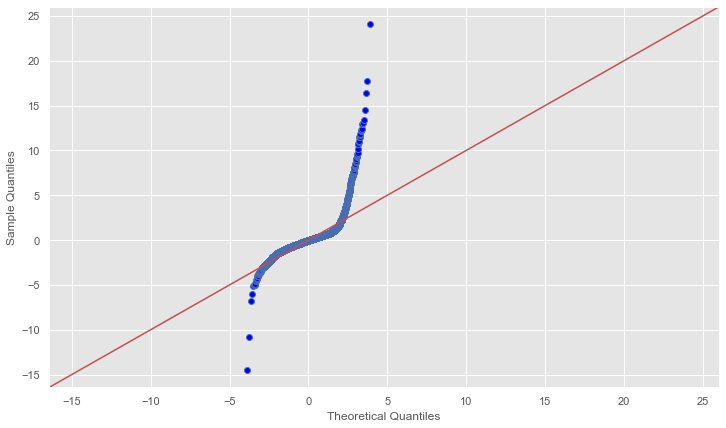

In [78]:
fig = sm.graphics.qqplot(model_c.resid, dist=stats.norm, line='45', fit=True)

### Check the Homoscedasticity Assumption

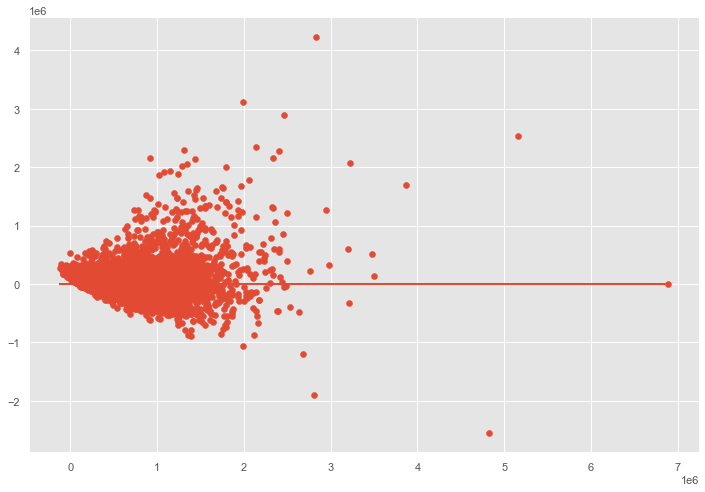

In [79]:
#Visualizing the errors

plt.figure(figsize=(12,8))

plt.scatter(model_c.predict(df_c[x_cols]), model_c.resid)
plt.plot(model_c.predict(df_c[x_cols]), [0 for i in range(len(df_c))])

Comment: Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

## Make Additional Refinements

Comment: Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

<AxesSubplot:>

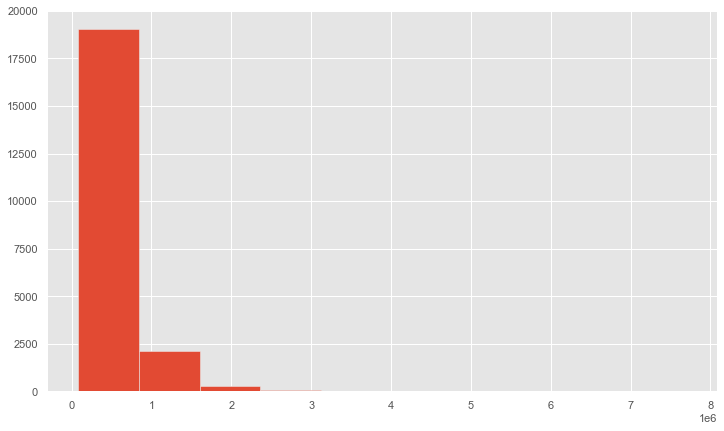

In [80]:
df['price'].hist()

In [81]:
for i in range(80,100):
    q = i/100
    #print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))
    print(f'percentile {(q,df.price.quantile(q=q))}')

percentile (0.8, 700435.9999999998)
percentile (0.81, 718000.0)
percentile (0.82, 730000.72)
percentile (0.83, 749950.0)
percentile (0.84, 760003.2)
percentile (0.85, 779721.9999999992)
percentile (0.86, 799000.0)
percentile (0.87, 815000.0)
percentile (0.88, 836739.9999999998)
percentile (0.89, 859967.6)
percentile (0.9, 887000.0)
percentile (0.91, 919993.6)
percentile (0.92, 950000.0)
percentile (0.93, 997964.0000000001)
percentile (0.94, 1060000.0)
percentile (0.95, 1160000.0)
percentile (0.96, 1260000.0)
percentile (0.97, 1390000.0)
percentile (0.98, 1600000.0)
percentile (0.99, 1970000.0)


In [82]:
orig_tot = len(df_c)
df_c = df_c[df_c.price <= 1600000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_c))/orig_tot)
df_c.price = df_c.price.map(np.log) # Applying a log transformation

Percent removed: 0.019724961800250036


In [83]:
# Refit model with subset features
outcome='price'
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1373.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:30   Log-Likelihood:                 4820.4
No. Observations:               21171   AIC:                            -9477.
Df Residuals:                   21089   BIC:                            -8824.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.7984      0.012    944.949      0.000      11.774      11.823
sqft_living       0.0002   2.91e-06     70.871      0.000       0.000       0.000
sqft_living15     0.0001   3.52e-06     30.016      0.000    9.88e-05       0.000
grade             0.0946      0.002     47.015      0.000       0.091       0.099
season_Spring     0.0434      0.003     14.959      0.000       0.038       0.049
condition_2      -0.0483      0.003    -15.124      0.000      -0.055      -0.042
condition_4       0.0706      0.005     12.921      0.000       0.060       0.081
bedroom_1        -0.0588      0.014     -4.058      0.000      -0.087      -0.030
bedroom_2        -0.0275      0.004     -6.261      0.000      -0.036      -0.019
bedroom_7        -0.1465      0.035     -4.158      0.000      -0.216      -0.077
bathroom_0_75     0.0137      0.024      0.577      0.564      -0.033       0.060
bathroom_4_0     -0.0653      0.019     -3.392      0.001      -0.103      -0.028
bathroom_4_25    -0.0711      0.027     -2.618      0.009      -0.124      -0.018
bathroom_4_5     -0.0886      0.023     -3.849      0.000      -0.134      -0.043
bathroom_4_75    -0.1220      0.073     -1.661      0.097      -0.266       0.022
bathroom_5_5     -0.1275      0.097     -1.309      0.191      -0.318       0.063
bathroom_5_75    -0.0924      0.196     -0.470      0.638      -0.477       0.293
bathroom_6_0     -0.7148      0.137     -5.215      0.000      -0.983      -0.446
bathroom_6_25  3.242e-15   6.02e-16      5.384      0.000    2.06e-15    4.42e-15
bathroom_7_5     -0.4620      0.194     -2.388      0.017      -0.841      -0.083
bathroom_7_75 -5.545e-15   1.29e-15     -4.312      0.000   -8.07e-15   -3.02e-15
bathroom_8_0  -2.848e-16   1.71e-16     -1.664      0.096    -6.2e-16    5.08e-17
zip_98001        -0.5632      0.011    -51.299      0.000      -0.585      -0.542
zip_98002        -0.5850      0.014    -40.719      0.000      -0.613      -0.557
zip_98003        -0.5492      0.012    -44.794      0.000      -0.573      -0.525
zip_98004         0.4910      0.014     36.138      0.000       0.464       0.518
zip_98005         0.1385      0.016      8.771      0.000       0.108       0.169
zip_98006         0.0347      0.010      3.451      0.001       0.015       0.054
zip_98008         0.0877      0.012      7.095      0.000       0.063       0.112
zip_98010        -0.2889      0.020    -14.625      0.000      -0.328      -0.250
zip_98011        -0.1346      0.014     -9.307      0.000      -0.163      -0.106
zip_98014        -0.2062      0.018    -11.443      0.000      -0.242      -0.171
zip_98019        -0.2310      0.015    -15.773      0.000      -0.260      -0.202
zip_98022        -0.4405      0.013    -33.054      0.000      -0.467      -0.414
zip_98023        -0.6031      0.010    -62.861   

### Check the Normality Assumption

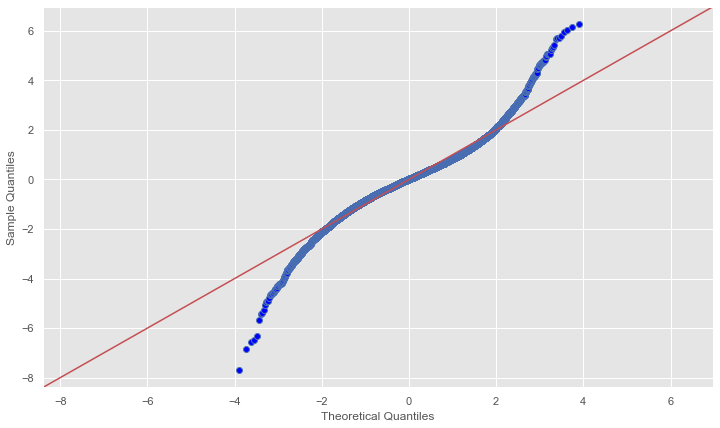

In [84]:
fig = sm.graphics.qqplot(model.resid,dist = stats.norm, line='45',fit=True)

### Check the Homoscedasticity

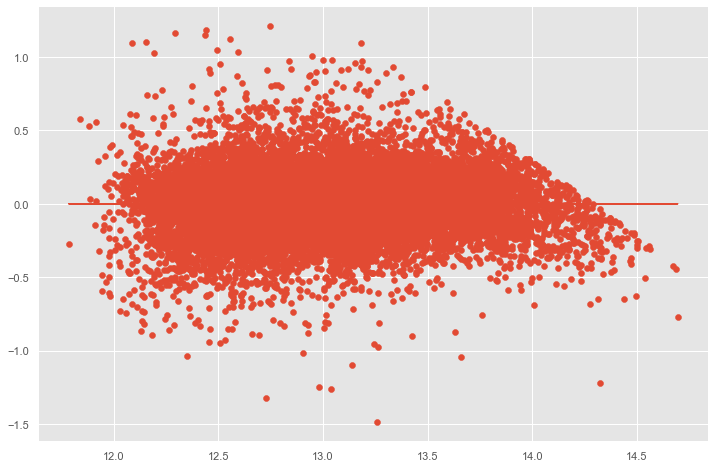

In [85]:
#Visualizing the errors

plt.figure(figsize=(12,8))

plt.scatter(model.predict(df_c[x_cols]), model.resid)
plt.plot(model.predict(df_c[x_cols]), [0 for i in range(len(df_c))])

### Refine the model once again

percentile (0.8, 13.432784936825598)
percentile (0.81, 13.45597438174451)
percentile (0.82, 13.473020249017498)
percentile (0.83, 13.493671726933949)
percentile (0.84, 13.51156355630531)
percentile (0.85, 13.527828485512494)
percentile (0.86, 13.550255105837401)
percentile (0.87, 13.569610019527449)
percentile (0.88, 13.592367006650065)
percentile (0.89, 13.617059619240436)
percentile (0.9, 13.641752231830807)
percentile (0.91, 13.670484785914017)
percentile (0.92, 13.704176627732581)
percentile (0.93, 13.736575517210897)
percentile (0.94, 13.77455313565391)
percentile (0.95, 13.815510557964274)
percentile (0.96, 13.892471599100402)
percentile (0.97, 13.972514306773938)
percentile (0.98, 14.054527458434775)
percentile (0.99, 14.151982794585487)


<AxesSubplot:>

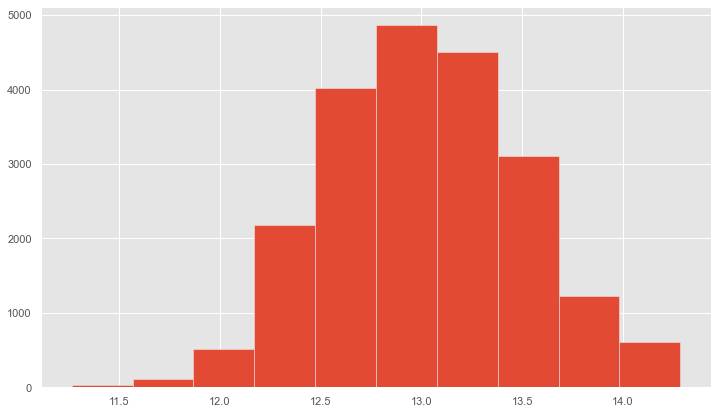

In [86]:
for i in range(80,100):
    q = i/100
    print(f'percentile {(q,df_c.price.quantile(q=q))}')
df_c.price.hist()

In [87]:
df_c = df_c[df_c.price <= 14]


# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:31   Log-Likelihood:                 5136.2
No. Observations:               20619   AIC:                        -1.011e+04
Df Residuals:                   20537   BIC:                            -9458.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.8341      0.013    937.542      0.000      11.809      11.859
sqft_living       0.0002   2.97e-06     68.641      0.000       0.000       0.000
sqft_living15     0.0001    3.6e-06     30.214      0.000       0.000       0.000
grade             0.0894      0.002     44.188      0.000       0.085       0.093
season_Spring     0.0431      0.003     14.980      0.000       0.038       0.049
condition_2      -0.0471      0.003    -14.843      0.000      -0.053      -0.041
condition_4       0.0690      0.005     12.670      0.000       0.058       0.080
bedroom_1        -0.0668      0.014     -4.692      0.000      -0.095      -0.039
bedroom_2        -0.0290      0.004     -6.702      0.000      -0.038      -0.021
bedroom_7        -0.1200      0.035     -3.427      0.001      -0.189      -0.051
bathroom_0_75     0.0105      0.023      0.453      0.651      -0.035       0.056
bathroom_4_0     -0.0735      0.022     -3.415      0.001      -0.116      -0.031
bathroom_4_25    -0.0861      0.033     -2.627      0.009      -0.150      -0.022
bathroom_4_5     -0.1230      0.027     -4.625      0.000      -0.175      -0.071
bathroom_4_75    -0.1722      0.085     -2.024      0.043      -0.339      -0.005
bathroom_5_5     -0.3296      0.189     -1.740      0.082      -0.701       0.042
bathroom_5_75    -0.1123      0.192     -0.584      0.559      -0.489       0.265
bathroom_6_0     -1.0207      0.190     -5.386      0.000      -1.392      -0.649
bathroom_6_25   1.65e-15   3.94e-16      4.192      0.000    8.79e-16    2.42e-15
bathroom_7_5     -0.4442      0.189     -2.345      0.019      -0.816      -0.073
bathroom_7_75 -2.101e-15   8.12e-16     -2.586      0.010   -3.69e-15   -5.08e-16
bathroom_8_0   3.362e-16   2.85e-16      1.178      0.239   -2.23e-16    8.96e-16
zip_98001        -0.5614      0.011    -52.193      0.000      -0.582      -0.540
zip_98002        -0.5853      0.014    -41.588      0.000      -0.613      -0.558
zip_98003        -0.5461      0.012    -45.471      0.000      -0.570      -0.523
zip_98004         0.4609      0.015     30.030      0.000       0.431       0.491
zip_98005         0.1470      0.016      9.340      0.000       0.116       0.178
zip_98006         0.0478      0.010      4.669      0.000       0.028       0.068
zip_98008         0.0825      0.012      6.724      0.000       0.058       0.107
zip_98010        -0.2858      0.019    -14.773      0.000      -0.324      -0.248
zip_98011        -0.1308      0.014     -9.233      0.000      -0.159      -0.103
zip_98014        -0.2062      0.018    -11.652      0.000      -0.241      -0.172
zip_98019        -0.2282      0.014    -15.906      0.000      -0.256      -0.200
zip_98022        -0.4388      0.013    -33.611      0.000      -0.464      -0.413
zip_98023        -0.6005      0.009    -63.815   

In [88]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols= list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols)
#print(x_cols[:5])
p_table.head()

85 79
['sqft_living', 'sqft_living15', 'grade', 'season_Spring', 'condition_2', 'condition_4', 'bedroom_1', 'bedroom_2', 'bedroom_7', 'bathroom_4_0', 'bathroom_4_25', 'bathroom_4_5', 'bathroom_4_75', 'bathroom_6_0', 'bathroom_6_25', 'bathroom_7_5', 'bathroom_7_75', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98027', 'zip_98028', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_9

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,11.8341,0.013,937.542,0.000,11.809,11.859
sqft_living,0.0002,2.97e-06,68.641,0.000,0.000,0.000
sqft_living15,0.0001,3.6e-06,30.214,0.000,0.000,0.000
grade,0.0894,0.002,44.188,0.000,0.085,0.093
season_Spring,0.0431,0.003,14.980,0.000,0.038,0.049


Refit the model with subset features.

In [89]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1270.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:32:32   Log-Likelihood:                 5133.0
No. Observations:               20619   AIC:                        -1.011e+04
Df Residuals:                   20541   BIC:                            -9491.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.8353      0.013    940.261      0.000      11.811      11.860
sqft_living       0.0002   2.96e-06     68.603      0.000       0.000       0.000
sqft_living15     0.0001    3.6e-06     30.289      0.000       0.000       0.000
grade             0.0895      0.002     44.491      0.000       0.086       0.093
season_Spring     0.0432      0.003     14.984      0.000       0.038       0.049
condition_2      -0.0469      0.003    -14.801      0.000      -0.053      -0.041
condition_4       0.0690      0.005     12.670      0.000       0.058       0.080
bedroom_1        -0.0657      0.014     -4.718      0.000      -0.093      -0.038
bedroom_2        -0.0291      0.004     -6.731      0.000      -0.038      -0.021
bedroom_7        -0.1240      0.034     -3.597      0.000      -0.192      -0.056
bathroom_4_0     -0.0731      0.022     -3.399      0.001      -0.115      -0.031
bathroom_4_25    -0.0850      0.033     -2.594      0.009      -0.149      -0.021
bathroom_4_5     -0.1219      0.027     -4.584      0.000      -0.174      -0.070
bathroom_4_75    -0.1713      0.085     -2.014      0.044      -0.338      -0.005
bathroom_6_0     -1.0202      0.190     -5.383      0.000      -1.392      -0.649
bathroom_6_25  3.556e-15   9.15e-16      3.885      0.000    1.76e-15    5.35e-15
bathroom_7_5     -0.4436      0.189     -2.341      0.019      -0.815      -0.072
bathroom_7_75  5.079e-16   3.92e-16      1.297      0.195    -2.6e-16    1.28e-15
zip_98001        -0.5637      0.011    -52.863      0.000      -0.585      -0.543
zip_98002        -0.5875      0.014    -41.919      0.000      -0.615      -0.560
zip_98003        -0.5486      0.012    -46.005      0.000      -0.572      -0.525
zip_98004         0.4584      0.015     30.006      0.000       0.428       0.488
zip_98005         0.1445      0.016      9.226      0.000       0.114       0.175
zip_98006         0.0453      0.010      4.477      0.000       0.025       0.065
zip_98008         0.0801      0.012      6.575      0.000       0.056       0.104
zip_98010        -0.2880      0.019    -14.928      0.000      -0.326      -0.250
zip_98011        -0.1333      0.014     -9.459      0.000      -0.161      -0.106
zip_98014        -0.2082      0.018    -11.810      0.000      -0.243      -0.174
zip_98019        -0.2306      0.014    -16.153      0.000      -0.259      -0.203
zip_98022        -0.4411      0.013    -33.969      0.000      -0.467      -0.416
zip_98023        -0.6030      0.009    -64.839      0.000      -0.621      -0.585
zip_98027        -0.0731      0.010     -7.113      0.000      -0.093      -0.053
zip_98028        -0.1600      0.012    -13.447      0.000      -0.183      -0.137
zip_98030        -0.5186      0.012    -41.738      0.000      -0.543      -0.494
zip_98031        -0.4997      0.012    -41.397   

### Check the Normality Assumption

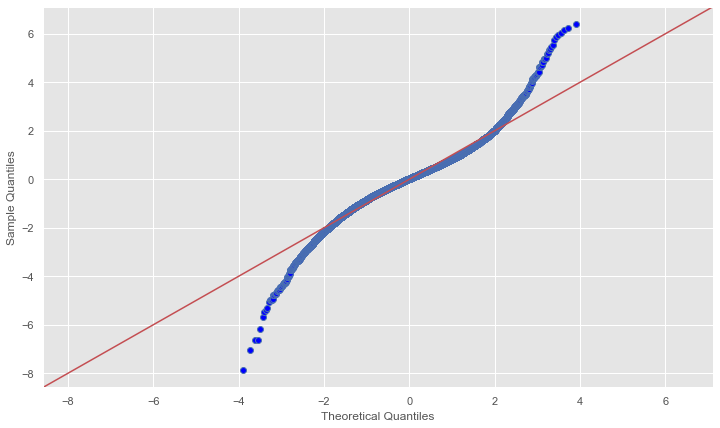

In [90]:
fig=sm.graphics.qqplot(model.resid,dist=stats.norm, line='45',fit=True)

### Check Homoscedasticity

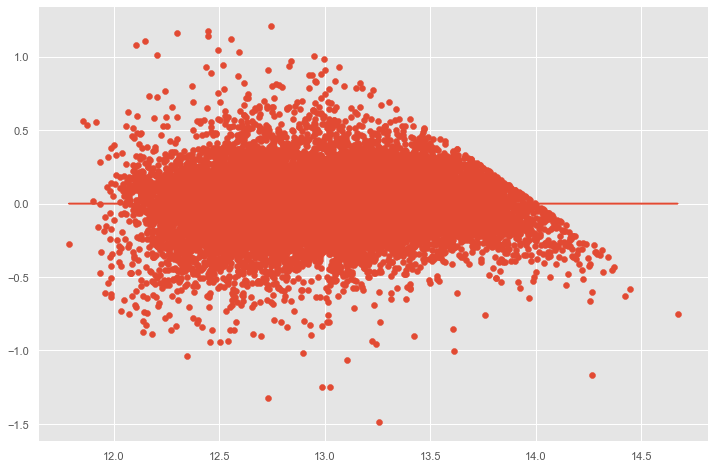

In [91]:
#Visualizing the errors

plt.figure(figsize=(12,8))

plt.scatter(model.predict(df_c[x_cols]), model.resid)
plt.plot(model.predict(df_c[x_cols]), [0 for i in range(len(df_c))])

## Feature ranking with recursive feature elimination

In [92]:
y = df_c[['price']]
X = df_c.drop(['price'],axis = 1)

In [127]:
#best performing features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=82)
selector = selector.fit(X, y)

feature_xcols= X.columns.values[selector.support_]
feature_xcols

array(['grade', 'condition_4', 'bedroom_1', 'bedroom_2', 'bedroom_8',
       'bathroom_0_5', 'bathroom_1_25', 'bathroom_4_0', 'bathroom_4_25',
       'bathroom_4_5', 'bathroom_4_75', 'bathroom_6_0', 'zip_98001',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_9812

In [128]:
# Refit model with subset features
predictors = '+'.join(feature_xcols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     734.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:51:49   Log-Likelihood:                 1100.8
No. Observations:               20619   AIC:                            -2038.
Df Residuals:                   20537   BIC:                            -1387.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2505      0.014    818.532      0.000      11.224      11.277
grade             0.2125      0.002    118.347      0.000       0.209       0.216
condition_4       0.1191      0.006     19.338      0.000       0.107       0.131
bedroom_1        -0.1500      0.017     -8.902      0.000      -0.183      -0.117
bedroom_2        -0.1303      0.005    -25.595      0.000      -0.140      -0.120
bedroom_8         0.1116      0.077      1.452      0.147      -0.039       0.262
bathroom_0_5     -0.2116      0.115     -1.837      0.066      -0.437       0.014
bathroom_1_25    -0.2334      0.087     -2.679      0.007      -0.404      -0.063
bathroom_4_0      0.1176      0.026      4.536      0.000       0.067       0.168
bathroom_4_25     0.2193      0.040      5.535      0.000       0.142       0.297
bathroom_4_5      0.1387      0.032      4.325      0.000       0.076       0.202
bathroom_4_75     0.1729      0.103      1.679      0.093      -0.029       0.375
bathroom_6_0     -0.4631      0.230     -2.012      0.044      -0.914      -0.012
zip_98001        -0.3038      0.012    -25.052      0.000      -0.328      -0.280
zip_98002        -0.3351      0.016    -20.607      0.000      -0.367      -0.303
zip_98003        -0.3095      0.014    -22.560      0.000      -0.336      -0.283
zip_98004         0.7561      0.018     42.524      0.000       0.721       0.791
zip_98005         0.4808      0.018     26.303      0.000       0.445       0.517
zip_98006         0.3725      0.011     32.734      0.000       0.350       0.395
zip_98007         0.3371      0.019     17.346      0.000       0.299       0.375
zip_98008         0.3515      0.014     25.076      0.000       0.324       0.379
zip_98010         0.0296      0.023      1.302      0.193      -0.015       0.074
zip_98011         0.1741      0.016     10.626      0.000       0.142       0.206
zip_98014         0.0868      0.021      4.187      0.000       0.046       0.127
zip_98019         0.0759      0.017      4.578      0.000       0.043       0.108
zip_98022        -0.1769      0.015    -11.781      0.000      -0.206      -0.147
zip_98023        -0.3483      0.010    -33.508      0.000      -0.369      -0.328
zip_98024         0.2174      0.027      8.168      0.000       0.165       0.270
zip_98027         0.2455      0.012     21.115      0.000       0.223       0.268
zip_98028         0.1317      0.014      9.632      0.000       0.105       0.158
zip_98029         0.2379      0.013     18.242      0.000       0.212       0.263
zip_98030        -0.2551      0.014    -17.791      0.000      -0.283      -0.227
zip_98031        -0.2388      0.014    -17.193      0.000      -0.266      -0.212
zip_98032        -0.3657      0.020    -17.936      0.000      -0.406      -0.326
zip_98033         0.4628      0.012     39.050   

## Regression Model Validation

In [112]:
y = df_c[['price']]
X = df_c.drop(['price'],axis = 1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 42)

In [114]:
print(len(X_train), len(X_test),len(y_train),len(y_test))

16495 4124 16495 4124


In [115]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_hat_train =linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [116]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [117]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.03517247600275417
Test Mean Squarred Error: 0.036232153062369946


From above, there doesn't seem to be a big difference between the train and test MSE. So there is no overfitting or underfitting of the model.

Text(0.5, 0, 'Predicted Y')

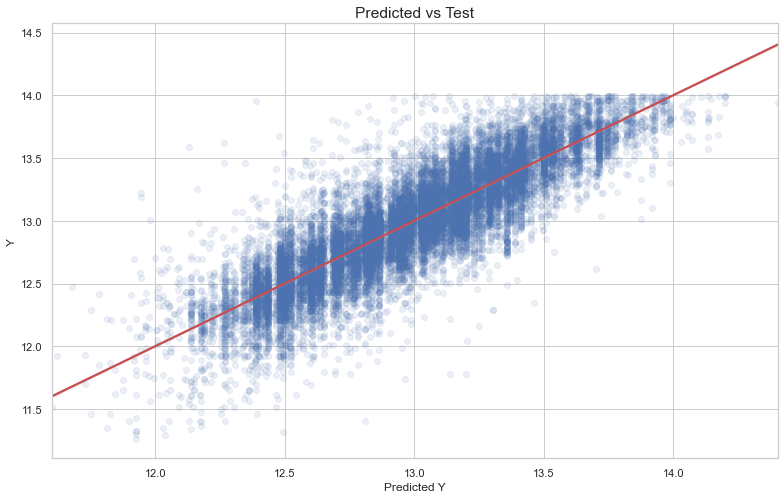

In [118]:
#plotting the predicted vs. test

test_pred = model.predict(X)
residuals_test = y- test_pred

plt.figure(figsize = (13,8))

sns.set(style = "whitegrid")

sns.regplot(test_pred, y, scatter_kws = {'color':'b','alpha':0.1},color='r')
sns.set(font_scale = 1.3)
plt.title('Predicted vs Test')
plt.ylabel('Y')
plt.xlabel('Predicted Y')

With Recursive Feature Elimination, 80 features is chosen and the final model accounts for 74 % of the house prices.

The final model's mean squared values for test and train sets indicates that the final model is not ovetfitting or underfitting.

# Conclusion

## Recommendations

- Grade, living space, condition, bathroom impact the housing prices greatly
- Where the house is located determines the price

## Next Step

- In order to provide more thorough analysis and suggestion, some more features could be explored further, like school district, crime statistics, household income, and distance to public transportation
- Mortgage interest rates and inventory on the market also impact housing prices
- More concrete insights can be established with a longer period of housing price history